In [ ]:
pip install neo4j


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.8/192.8 kB 4.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for neo4j: filename=neo4j-5.14.1-py3-none-any.whl size=267560 sha256=7021dd35f8aa320cda6bcca6eb2554b4cca9bb1643c899692c7c28d3d447e697
  Stored in directory: /root/.cache/pip/wheels/13/01/ff/de2142e172dafcd475f118499db2140c66562e42fd500c460a
Successfully built neo4j


In [ ]:
# Import necessary libraries
from neo4j import GraphDatabase

# Configuration parameters
uri = "neo4j+s://28e5b287.databases.neo4j.io"
username = "neo4j"
password = "z9J3DPCCxGYELn99XDdFbFIBnWOwR5fdn4MiG_Nvdck"

# Create a database driver
driver = GraphDatabase.driver(uri, auth=(username, password))

# Session function
def run_query(query):
    with driver.session() as session:
        return list(session.run(query))

# Example Query: Fetch and print the first 10 nodes from the database
query = "MATCH (n) RETURN n LIMIT 10"
results = run_query(query)

for record in results:
    print(record)

# Close the driver connection
driver.close()


<Record n=<Node element_id='4:cf617945-069d-4b97-bab6-32e635b19322:0' labels=frozenset({'Node'}) properties={'id': '3356'}>>
<Record n=<Node element_id='4:cf617945-069d-4b97-bab6-32e635b19322:1' labels=frozenset({'Node'}) properties={'id': '45896'}>>
<Record n=<Node element_id='4:cf617945-069d-4b97-bab6-32e635b19322:2' labels=frozenset({'Node'}) properties={'id': '6830'}>>
<Record n=<Node element_id='4:cf617945-069d-4b97-bab6-32e635b19322:3' labels=frozenset({'Node'}) properties={'id': '8758'}>>
<Record n=<Node element_id='4:cf617945-069d-4b97-bab6-32e635b19322:4' labels=frozenset({'Node'}) properties={'id': '6939'}>>
<Record n=<Node element_id='4:cf617945-069d-4b97-bab6-32e635b19322:5' labels=frozenset({'Node'}) properties={'id': '4826'}>>
<Record n=<Node element_id='4:cf617945-069d-4b97-bab6-32e635b19322:6' labels=frozenset({'Node'}) properties={'id': '38803'}>>
<Record n=<Node element_id='4:cf617945-069d-4b97-bab6-32e635b19322:7' labels=frozenset({'Node'}) properties={'id': '56203'}

In [ ]:
pip install py2neo networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.2/177.2 kB 4.1 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from py2neo import Graph

# Connect to Neo4j
graph = Graph(uri="neo4j+s://28e5b287.databases.neo4j.io", auth=("neo4j", "z9J3DPCCxGYELn99XDdFbFIBnWOwR5fdn4MiG_Nvdck"))

# Fetch some data from Neo4j for visualization
query = """
MATCH (n)-[r]->(m)
RETURN n, r, m LIMIT 100
"""

data = graph.run(query)

# Create a directed graph using networkx
G = nx.DiGraph()

for record in data:
    # Add nodes
    G.add_node(record["n"]["id"]) # Assuming nodes have a 'name' property
    G.add_node(record["m"]["id"])

    # Add edge
    G.add_edge(record["n"]["id"], record["m"]["id"], type=type(record["r"]).__name__)



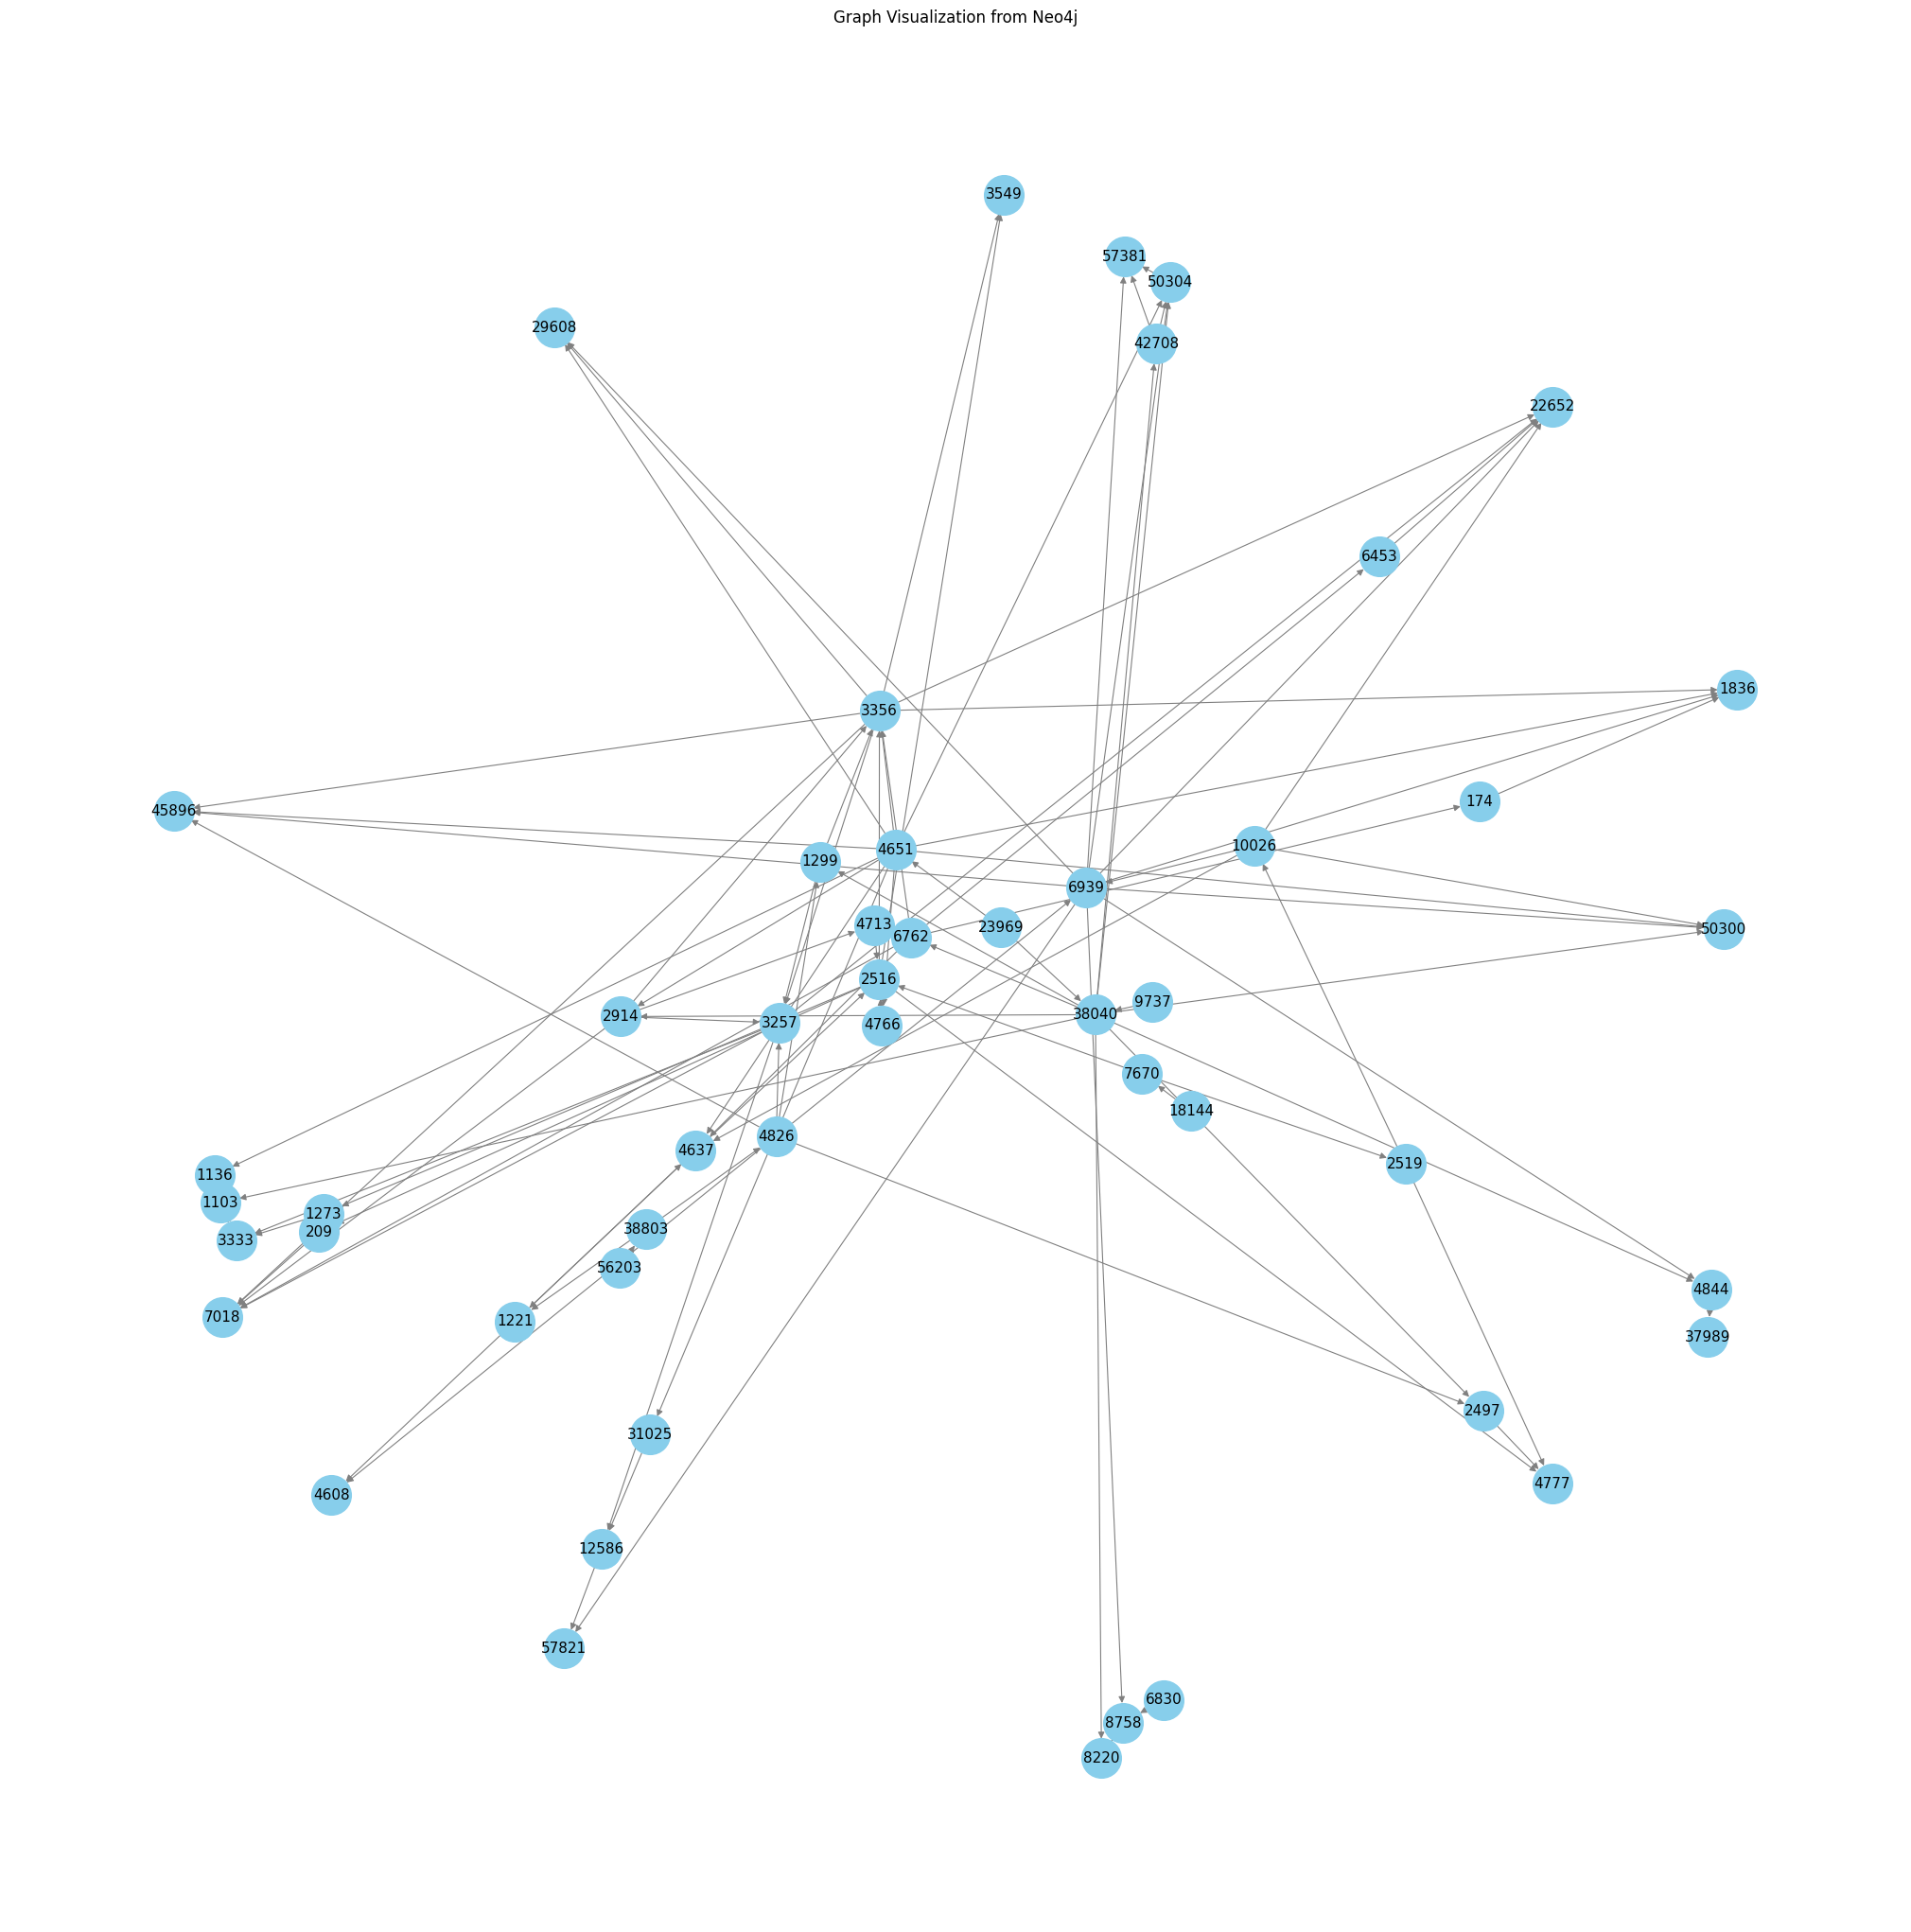

In [ ]:

# Draw the graph
pos = nx.spring_layout(G)
plt.figure(figsize=(20, 20))
nx.draw(G, pos, with_labels=True, node_size=900, node_color="skyblue", font_size=11, width=0.8, edge_color="gray")
plt.title("Graph Visualization from Neo4j")
plt.show()

# Basic operations

In [ ]:
# Retrieve all nodes
all_nodes = G.nodes()

# Print all nodes
print("Num of nodes in the graph:")
print(len(all_nodes))

Num of nodes in the graph:
50


In [ ]:
# Calculate the number of edges
num_edges = G.size()

print(f"The graph has {num_edges} edges (or arcs).")

The graph has 100 edges (or arcs).


# Degree centrality

### in-degree for all nodes

In [ ]:
# Calculate in-degrees for all nodes
in_degrees = G.in_degree()

# Print in-degrees for all nodes
for node, degree in in_degrees:
    print(f"Node {node} has {degree} incoming links.")

Node 3356 has 5 incoming links.
Node 45896 has 4 incoming links.
Node 3549 has 2 incoming links.
Node 29608 has 3 incoming links.
Node 22652 has 5 incoming links.
Node 3257 has 4 incoming links.
Node 7018 has 5 incoming links.
Node 1836 has 4 incoming links.
Node 6830 has 0 incoming links.
Node 8758 has 3 incoming links.
Node 6939 has 2 incoming links.
Node 4844 has 2 incoming links.
Node 57821 has 2 incoming links.
Node 57381 has 3 incoming links.
Node 50300 has 4 incoming links.
Node 50304 has 4 incoming links.
Node 4826 has 1 incoming links.
Node 2497 has 2 incoming links.
Node 4608 has 2 incoming links.
Node 1299 has 2 incoming links.
Node 38803 has 1 incoming links.
Node 1221 has 2 incoming links.
Node 56203 has 0 incoming links.
Node 4777 has 3 incoming links.
Node 37989 has 1 incoming links.
Node 3333 has 4 incoming links.
Node 12586 has 2 incoming links.
Node 2516 has 4 incoming links.
Node 209 has 1 incoming links.
Node 1273 has 1 incoming links.
Node 4637 has 4 incoming links

### out-degree for all nodes

In [ ]:
# Calculate out-degrees for all nodes
out_degrees = G.out_degree()

# Print out-degrees for all nodes
for node, degree in out_degrees:
    print(f"Node {node} has {degree} outgoing links.")

Node 3356 has 7 outgoing links.
Node 45896 has 0 outgoing links.
Node 3549 has 0 outgoing links.
Node 29608 has 0 outgoing links.
Node 22652 has 0 outgoing links.
Node 3257 has 4 outgoing links.
Node 7018 has 0 outgoing links.
Node 1836 has 0 outgoing links.
Node 6830 has 1 outgoing links.
Node 8758 has 0 outgoing links.
Node 6939 has 10 outgoing links.
Node 4844 has 1 outgoing links.
Node 57821 has 0 outgoing links.
Node 57381 has 0 outgoing links.
Node 50300 has 0 outgoing links.
Node 50304 has 1 outgoing links.
Node 4826 has 6 outgoing links.
Node 2497 has 1 outgoing links.
Node 4608 has 0 outgoing links.
Node 1299 has 2 outgoing links.
Node 38803 has 2 outgoing links.
Node 1221 has 2 outgoing links.
Node 56203 has 1 outgoing links.
Node 4777 has 0 outgoing links.
Node 37989 has 0 outgoing links.
Node 3333 has 0 outgoing links.
Node 12586 has 1 outgoing links.
Node 2516 has 5 outgoing links.
Node 209 has 1 outgoing links.
Node 1273 has 1 outgoing links.
Node 4637 has 2 outgoing link

### Total number of links for all nodes

In [ ]:
# Calculate total degree (in-degree + out-degree) for all nodes
total_degrees = G.degree()

# Print total degree for all nodes
for node, degree in total_degrees:
    print(f"Node {node} has {degree} links.")

Node 3356 has 12 links.
Node 45896 has 4 links.
Node 3549 has 2 links.
Node 29608 has 3 links.
Node 22652 has 5 links.
Node 3257 has 8 links.
Node 7018 has 5 links.
Node 1836 has 4 links.
Node 6830 has 1 links.
Node 8758 has 3 links.
Node 6939 has 12 links.
Node 4844 has 3 links.
Node 57821 has 2 links.
Node 57381 has 3 links.
Node 50300 has 4 links.
Node 50304 has 5 links.
Node 4826 has 7 links.
Node 2497 has 3 links.
Node 4608 has 2 links.
Node 1299 has 4 links.
Node 38803 has 3 links.
Node 1221 has 4 links.
Node 56203 has 1 links.
Node 4777 has 3 links.
Node 37989 has 1 links.
Node 3333 has 4 links.
Node 12586 has 3 links.
Node 2516 has 9 links.
Node 209 has 2 links.
Node 1273 has 2 links.
Node 4637 has 6 links.
Node 10026 has 5 links.
Node 2519 has 3 links.
Node 7670 has 3 links.
Node 18144 has 1 links.
Node 38040 has 12 links.
Node 6762 has 6 links.
Node 2914 has 6 links.
Node 8220 has 2 links.
Node 1103 has 2 links.
Node 42708 has 3 links.
Node 9737 has 1 links.
Node 174 has 2 li

### Total number of links connected with a specific node (id=10026)

In [ ]:
result = total_degrees["10026"]

print(f"Number of nodes directly connected to node with id=10026: {result}")

Number of nodes directly connected to node with id=10026: 5


### Number of incoming links to a specific node (id=10026)

In [ ]:
result = in_degrees["10026"]

print(f"Number of incoming relationships to node with id=10026: {result}")

Number of incoming relationships to node with id=10026: 1


### Number of outgoing links to a specific node (id=10026)

In [ ]:
result = out_degrees["10026"]

print(f"Number of outgoing relationships from node with id=10026: {result}")

Number of outgoing relationships from node with id=10026: 4


# 2. Betweenness

In [ ]:
# Compute betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Get betweenness centrality for node 10026
node_centrality = betweenness_centrality["10026"]

print(f"Betweenness centrality for node 10026: {node_centrality}")

Betweenness centrality for node 10026: 0.01998299319727891


# isolated nodes

In [ ]:
# Find isolated nodes
isolated_nodes = list(nx.isolates(G))

# Check and print results
if isolated_nodes:
    print("Isolated nodes in the graph:")
    for node in isolated_nodes:
        print(node)
else:
    print("No isolated nodes found.")

No isolated nodes found.


# complete graph

In [ ]:
def is_complete(G):
    n = len(G)
    if G.is_directed():
        return G.size() == n * (n - 1)
    else:
        return G.size() == n * (n - 1) // 2

# Check if G is a complete graph
if is_complete(G):
    print("G is a complete graph.")
else:
    print("G is not a complete graph.")

G is not a complete graph.


# clique

In [ ]:
# Convert G to its undirected version
G_undirected = G.to_undirected()

cliques = list(nx.find_cliques(G_undirected))

# Check if there are any cliques of size 2 or more
has_clique = any(len(clique) > 1 for clique in cliques)

if has_clique:
    print("G contains cliques. The cliques (of size 2 or more) are:")
    for clique in cliques:
        if len(clique) > 1:  # Only print cliques with more than one node
            print(clique)
else:
    print("G does not contain any clique (beyond single nodes).")

G contains cliques. The cliques (of size 2 or more) are:
['3356', '1299', '3257']
['3356', '4651', '29608']
['3356', '4651', '1836']
['3356', '4651', '2914']
['3356', '4651', '45896']
['3356', '3257', '2914', '7018']
['3356', '3257', '22652']
['3356', '7018', '6762']
['3356', '2516', '3549']
['8220', '8758']
['8220', '38040']
['4777', '2497']
['4777', '2516']
['4777', '2519']
['57821', '6939']
['57821', '12586']
['4844', '6939']
['4844', '37989']
['4844', '38040']
['6830', '8758']
['18144', '7670']
['7670', '2516']
['7670', '2519']
['50304', '6939', '57381']
['50304', '4651']
['50304', '42708', '38040']
['50304', '42708', '57381']
['1136', '3333']
['1136', '4651']
['38040', '1299']
['38040', '9737']
['38040', '2914']
['38040', '50300']
['38040', '2497']
['38040', '1103']
['38040', '6762']
['38040', '23969']
['4637', '4651']
['4637', '1221']
['4637', '2516']
['4637', '10026']
['4637', '6762']
['38803', '56203']
['38803', '1221']
['38803', '4826']
['6939', '29608']
['6939', '1836']
['693

In [ ]:
# Convert G to its undirected version
G_undirected = G.to_undirected()

cliques = list(nx.find_cliques(G_undirected))

for i in cliques:
  print(len(i))

3
3
3
3
3
4
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


# density

In [ ]:
# Compute the density of G
density = nx.density(G)

print(f"The density of G is: {density}")

The density of G is: 0.04081632653061224


# Reciprocity

In [ ]:
# Compute the reciprocity of G
reciprocity = nx.reciprocity(G)

print(f"The reciprocity of G is: {reciprocity}")

The reciprocity of G is: 0.02


# Global Clustering Coefficient

In [ ]:
# Assuming G is your graph object in networkx

# Compute the global clustering coefficient of G
global_clustering_coefficient = nx.transitivity(G)

print(f"The global clustering coefficient of G is: {global_clustering_coefficient}")

The global clustering coefficient of G is: 0.04185022026431718


# path length

In [ ]:
# Compute shortest path lengths for all pairs of nodes
all_pairs_lengths = dict(nx.all_pairs_shortest_path_length(G))

# For demonstration, print the shortest path lengths for some pairs (not all to avoid overwhelming output)
for node, lengths in list(all_pairs_lengths.items()):  # Change the number 10 to adjust the amount of output
    for target, length in lengths.items():
      if node == "4651" or target == "4651":
        print(f"Shortest path length between nodes {node} and {target} is: {length}")
      if node == "2519" or target == "2519":
        print(f"Shortest path length between nodes {node} and {target} is: {length}")

Shortest path length between nodes 2519 and 2519 is: 0
Shortest path length between nodes 2519 and 4777 is: 1
Shortest path length between nodes 2519 and 10026 is: 1
Shortest path length between nodes 2519 and 6939 is: 2
Shortest path length between nodes 2519 and 22652 is: 2
Shortest path length between nodes 2519 and 50300 is: 2
Shortest path length between nodes 2519 and 4637 is: 2
Shortest path length between nodes 2519 and 45896 is: 3
Shortest path length between nodes 2519 and 8758 is: 3
Shortest path length between nodes 2519 and 4844 is: 3
Shortest path length between nodes 2519 and 57821 is: 3
Shortest path length between nodes 2519 and 29608 is: 3
Shortest path length between nodes 2519 and 57381 is: 3
Shortest path length between nodes 2519 and 1836 is: 3
Shortest path length between nodes 2519 and 50304 is: 3
Shortest path length between nodes 2519 and 2516 is: 3
Shortest path length between nodes 2519 and 1221 is: 3
Shortest path length between nodes 2519 and 37989 is: 4
S

In [ ]:
# Connect to Neo4j
graph = Graph(uri="neo4j+s://28e5b287.databases.neo4j.io", auth=("neo4j", "z9J3DPCCxGYELn99XDdFbFIBnWOwR5fdn4MiG_Nvdck"))

# Query to find the shortest path length between Node 2519 and Node 4651
shortest_path_query = """
MATCH path = shortestPath((a {id: "2519"})-[*]-(b {id: "4651"}))
RETURN LENGTH(path) AS path_length
"""
path_length = graph.run(shortest_path_query).evaluate()

print(f"Shortest path length between Node 2519 and Node 4651: {path_length}")

Shortest path length between Node 2519 and Node 4651: 3


# local clustering coefficient.

In [ ]:
# Compute the local clustering coefficient for all nodes in G
local_clustering_coefficients = nx.clustering(G)

# Print the local clustering coefficients
for node, coefficient in local_clustering_coefficients.items():
    print(f"Node {node}: {coefficient}")

Node 3356: 0.08333333333333333
Node 45896: 0.16666666666666666
Node 3549: 0.5
Node 29608: 0.16666666666666666
Node 22652: 0.1
Node 3257: 0.10714285714285714
Node 7018: 0.2
Node 1836: 0.08333333333333333
Node 6830: 0
Node 8758: 0
Node 6939: 0.030303030303030304
Node 4844: 0
Node 57821: 0
Node 57381: 0.3333333333333333
Node 50300: 0.08333333333333333
Node 50304: 0.15
Node 4826: 0.047619047619047616
Node 2497: 0
Node 4608: 0
Node 1299: 0.16666666666666666
Node 38803: 0
Node 1221: 0
Node 56203: 0
Node 4777: 0
Node 37989: 0
Node 3333: 0
Node 12586: 0
Node 2516: 0.013888888888888888
Node 209: 0
Node 1273: 0
Node 4637: 0
Node 10026: 0.1
Node 2519: 0
Node 7670: 0
Node 18144: 0
Node 38040: 0.007575757575757576
Node 6762: 0.03333333333333333
Node 2914: 0.13333333333333333
Node 8220: 0
Node 1103: 0
Node 42708: 0.3333333333333333
Node 9737: 0
Node 174: 0
Node 6453: 0
Node 4713: 0
Node 4651: 0.030303030303030304
Node 4766: 0
Node 31025: 0
Node 1136: 0
Node 23969: 0
